# COVID 19 - Determining Key Indicators

## Team Name: pr0f3ss0r

### Data preparation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Loading datasets required for analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [2]:
def urban_to_float(x):
    try:
        return float(x.strip('%'))/100
    except:
        return np.nan

def cast_age_to_int(x):
    try:
        return int(x)
    except:
        return np.nan

def cast_fertility_to_float(x):
    try:
        return float(x)
    except:
        return np.nan


population_data = pd.read_csv("population_by_country_2020.csv", converters={'Urban Pop %':urban_to_float,
                                                                                                             'Fert. Rate':cast_fertility_to_float,
                                                                                                             'Med. Age':cast_age_to_int})
population_data.rename(columns={'Country (or dependency)': 'country',
                             'Population (2020)' : 'population',
                             'Density (P/Km²)' : 'density',
                             'Fert. Rate' : 'fertility',
                             'Med. Age' : "age",
                             'Urban Pop %' : 'urban_percentage'}, inplace=True)

population_data['country'] = population_data['country'].replace('United States', 'US')
population_data['country'] = population_data['country'].replace('United Kingdom', 'UK')
population_data['country'] =population_data['country'].str.lower()
population_data = population_data[["country", "population", "density", "fertility", "age", "urban_percentage"]]

population_data

,country,population,density,fertility,age,urban_percentage
0,china,1438207241,153,1.7,38.0,0.61
1,india,1377233523,464,2.2,28.0,0.35
2,us,330610570,36,1.8,38.0,0.83
3,indonesia,272931713,151,2.3,30.0,0.56
4,pakistan,219992900,287,3.6,23.0,0.35
...,...,...,...,...,...,...
230,montserrat,4991,50,NaN,NaN,0.10
231,falkland islands,3458,0,NaN,NaN,0.66
232,niue,1624,6,NaN,NaN,0.46
233,tokelau,1354,136,NaN,NaN,0.00


In [3]:
covid_data = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])

covid_data.rename(columns={'ObservationDate': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Last Update':'last_updated',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

cases = ['confirmed', 'deaths', 'recovered', 'active']

#No of Active Case computed as ,active = confirmed - deaths - recovered
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

# country name handling
covid_data['country'] = covid_data['country'].replace('Mainland China', 'China')
covid_data['country'] = covid_data['country'].replace('United States', 'US')
covid_data['country'] = covid_data['country'].replace( 'United Kingdom','UK')
covid_data['country'] = covid_data['country'].str.lower()
# filling missing values 
covid_data[['state']] = covid_data[['state']].fillna('')
covid_data[cases] = covid_data[cases].fillna(0)
covid_data.rename(columns={'Date':'date'}, inplace=True)

covid_data

,state,country,Lat,Long,date,confirmed,deaths,recovered,active
0,,afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0
1,,albania,41.153300,20.168300,2020-01-22,0,0,0,0
2,,algeria,28.033900,1.659600,2020-01-22,0,0,0,0
3,,andorra,42.506300,1.521800,2020-01-22,0,0,0,0
4,,angola,-11.202700,17.873900,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
24361,Saint Pierre and Miquelon,france,46.885200,-56.315900,2020-04-23,1,0,0,1
24362,,south sudan,6.877000,31.307000,2020-04-23,5,0,0,5
24363,,western sahara,24.215500,-12.885800,2020-04-23,6,0,5,1
24364,,sao tome and principe,0.186360,6.613081,2020-04-23,4,0,0,4


In [4]:
data = pd.merge(covid_data, population_data, on='country')
data

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,population,density,fertility,age,urban_percentage
0,,afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,38742911,60,4.6,18.0,0.25
1,,afghanistan,33.000000,65.000000,2020-01-23,0,0,0,0,38742911,60,4.6,18.0,0.25
2,,afghanistan,33.000000,65.000000,2020-01-24,0,0,0,0,38742911,60,4.6,18.0,0.25
3,,afghanistan,33.000000,65.000000,2020-01-25,0,0,0,0,38742911,60,4.6,18.0,0.25
4,,afghanistan,33.000000,65.000000,2020-01-26,0,0,0,0,38742911,60,4.6,18.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23152,,yemen,15.552727,48.516388,2020-04-19,1,0,0,1,29687214,56,3.8,20.0,0.38
23153,,yemen,15.552727,48.516388,2020-04-20,1,0,0,1,29687214,56,3.8,20.0,0.38
23154,,yemen,15.552727,48.516388,2020-04-21,1,0,0,1,29687214,56,3.8,20.0,0.38
23155,,yemen,15.552727,48.516388,2020-04-22,1,0,0,1,29687214,56,3.8,20.0,0.38


Step 2: Preparing the data

In [5]:
temperature_data = pd.read_csv("temperature_dataframe.csv")
temperature_data['country'] = temperature_data['country'].replace('USA', 'US')
#df_temperature['country'] = df_temperature['country'].replace('UK', 'United Kingdom')
temperature_data['country'] = temperature_data['country'].str.lower()
temperature_data = temperature_data[["country", "province", "date", "humidity", "sunHour", "tempC", "windspeedKmph"]].reset_index()
temperature_data.rename(columns={'province': 'state'}, inplace=True)
temperature_data["date"] = pd.to_datetime(temperature_data['date'])
temperature_data['state'] = temperature_data['state'].fillna('')
# df_temperature.info()

In [6]:
data = pd.merge(data,temperature_data, on=['country','state','date'],how='left')
data['mortality_rate'] = data['deaths'] / data['confirmed']

In [7]:
data

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,population,density,fertility,age,urban_percentage,index,humidity,sunHour,tempC,windspeedKmph,mortality_rate
0,,afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,38742911,60,4.6,18.0,0.25,0.0,65.0,8.7,-1.0,8.0,NaN
1,,afghanistan,33.000000,65.000000,2020-01-23,0,0,0,0,38742911,60,4.6,18.0,0.25,1.0,59.0,8.7,-3.0,8.0,NaN
2,,afghanistan,33.000000,65.000000,2020-01-24,0,0,0,0,38742911,60,4.6,18.0,0.25,2.0,71.0,7.1,0.0,7.0,NaN
3,,afghanistan,33.000000,65.000000,2020-01-25,0,0,0,0,38742911,60,4.6,18.0,0.25,3.0,79.0,8.7,0.0,7.0,NaN
4,,afghanistan,33.000000,65.000000,2020-01-26,0,0,0,0,38742911,60,4.6,18.0,0.25,4.0,64.0,8.7,-1.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23212,,yemen,15.552727,48.516388,2020-04-19,1,0,0,1,29687214,56,3.8,20.0,0.38,NaN,NaN,NaN,NaN,NaN,0.0
23213,,yemen,15.552727,48.516388,2020-04-20,1,0,0,1,29687214,56,3.8,20.0,0.38,NaN,NaN,NaN,NaN,NaN,0.0
23214,,yemen,15.552727,48.516388,2020-04-21,1,0,0,1,29687214,56,3.8,20.0,0.38,NaN,NaN,NaN,NaN,NaN,0.0
23215,,yemen,15.552727,48.516388,2020-04-22,1,0,0,1,29687214,56,3.8,20.0,0.38,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
#data.to_csv("coolcovid.csv")

In [9]:
data=data.drop(['index'], axis = 1) 

In [10]:
data=data.drop_duplicates()

In [11]:
data

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,population,density,fertility,age,urban_percentage,humidity,sunHour,tempC,windspeedKmph,mortality_rate
0,,afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,38742911,60,4.6,18.0,0.25,65.0,8.7,-1.0,8.0,NaN
1,,afghanistan,33.000000,65.000000,2020-01-23,0,0,0,0,38742911,60,4.6,18.0,0.25,59.0,8.7,-3.0,8.0,NaN
2,,afghanistan,33.000000,65.000000,2020-01-24,0,0,0,0,38742911,60,4.6,18.0,0.25,71.0,7.1,0.0,7.0,NaN
3,,afghanistan,33.000000,65.000000,2020-01-25,0,0,0,0,38742911,60,4.6,18.0,0.25,79.0,8.7,0.0,7.0,NaN
4,,afghanistan,33.000000,65.000000,2020-01-26,0,0,0,0,38742911,60,4.6,18.0,0.25,64.0,8.7,-1.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23212,,yemen,15.552727,48.516388,2020-04-19,1,0,0,1,29687214,56,3.8,20.0,0.38,NaN,NaN,NaN,NaN,0.0
23213,,yemen,15.552727,48.516388,2020-04-20,1,0,0,1,29687214,56,3.8,20.0,0.38,NaN,NaN,NaN,NaN,0.0
23214,,yemen,15.552727,48.516388,2020-04-21,1,0,0,1,29687214,56,3.8,20.0,0.38,NaN,NaN,NaN,NaN,0.0
23215,,yemen,15.552727,48.516388,2020-04-22,1,0,0,1,29687214,56,3.8,20.0,0.38,NaN,NaN,NaN,NaN,0.0


In [12]:
#data.to_csv("coolcovid1.csv")

Creating a consolidated table , which gives the country wise total defined cases

In [13]:
temp = data.groupby(['country', 'state'])['confirmed', 'deaths', 'recovered', 'active'].max()

In [14]:
temp = data.groupby('date')['confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()
temp = temp[temp['date']==max(temp['date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

,date,confirmed,deaths,recovered,active
0,2020-04-23 00:00:00,2696660,190560,716909,1789191


In [15]:
temp = data.groupby(['country', 'state'])['confirmed', 'deaths', 'recovered', 'active'].max()
temp = data.groupby('date')['confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()
temp = temp[temp['date']==max(temp['date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

,date,confirmed,deaths,recovered,active
0,2020-04-23 00:00:00,2696660,190560,716909,1789191


In [24]:
full_latest = data[data['date'] == max(data['date'])].reset_index()

In [25]:
full_latest =  full_latest.groupby(['country'])['confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()

In [18]:
#full_latest=full_latest.head(11)

In [26]:
temp_f = full_latest.sort_values(by='confirmed', ascending=False)
temp_f= temp_f.head(11)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

,country,confirmed,deaths,recovered,active
0,us,869170,49954,80203,739013
1,spain,213024,22157,89250,101617
2,italy,189973,25549,57576,106848
3,france,158303,21889,42762,93652
4,germany,153129,5575,103300,44254
5,uk,139246,18791,712,119743
6,turkey,101790,2491,18491,80808
7,iran,87026,5481,64843,16702
8,china,83884,4636,75531,3717
9,russia,62773,555,4891,57327


In [27]:
density_data = data.groupby(['density', 'country'])['confirmed'].sum()
density_data = density_data.reset_index()
density_data['density'] = pd.to_datetime(density_data['density'])
#density_data['date'] = density_data['date'].dt.strftime('%m/%d/%Y')

In [28]:
fig = px.scatter_geo(density_data.fillna(0), locations="country", locationmode='country names', 
                     color="confirmed", size='confirmed', hover_name="country", 
                     range_color= [0, 900000], 
                     projection="natural earth", animation_frame="confirmed", 
                     title='COVID-19: density by country', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

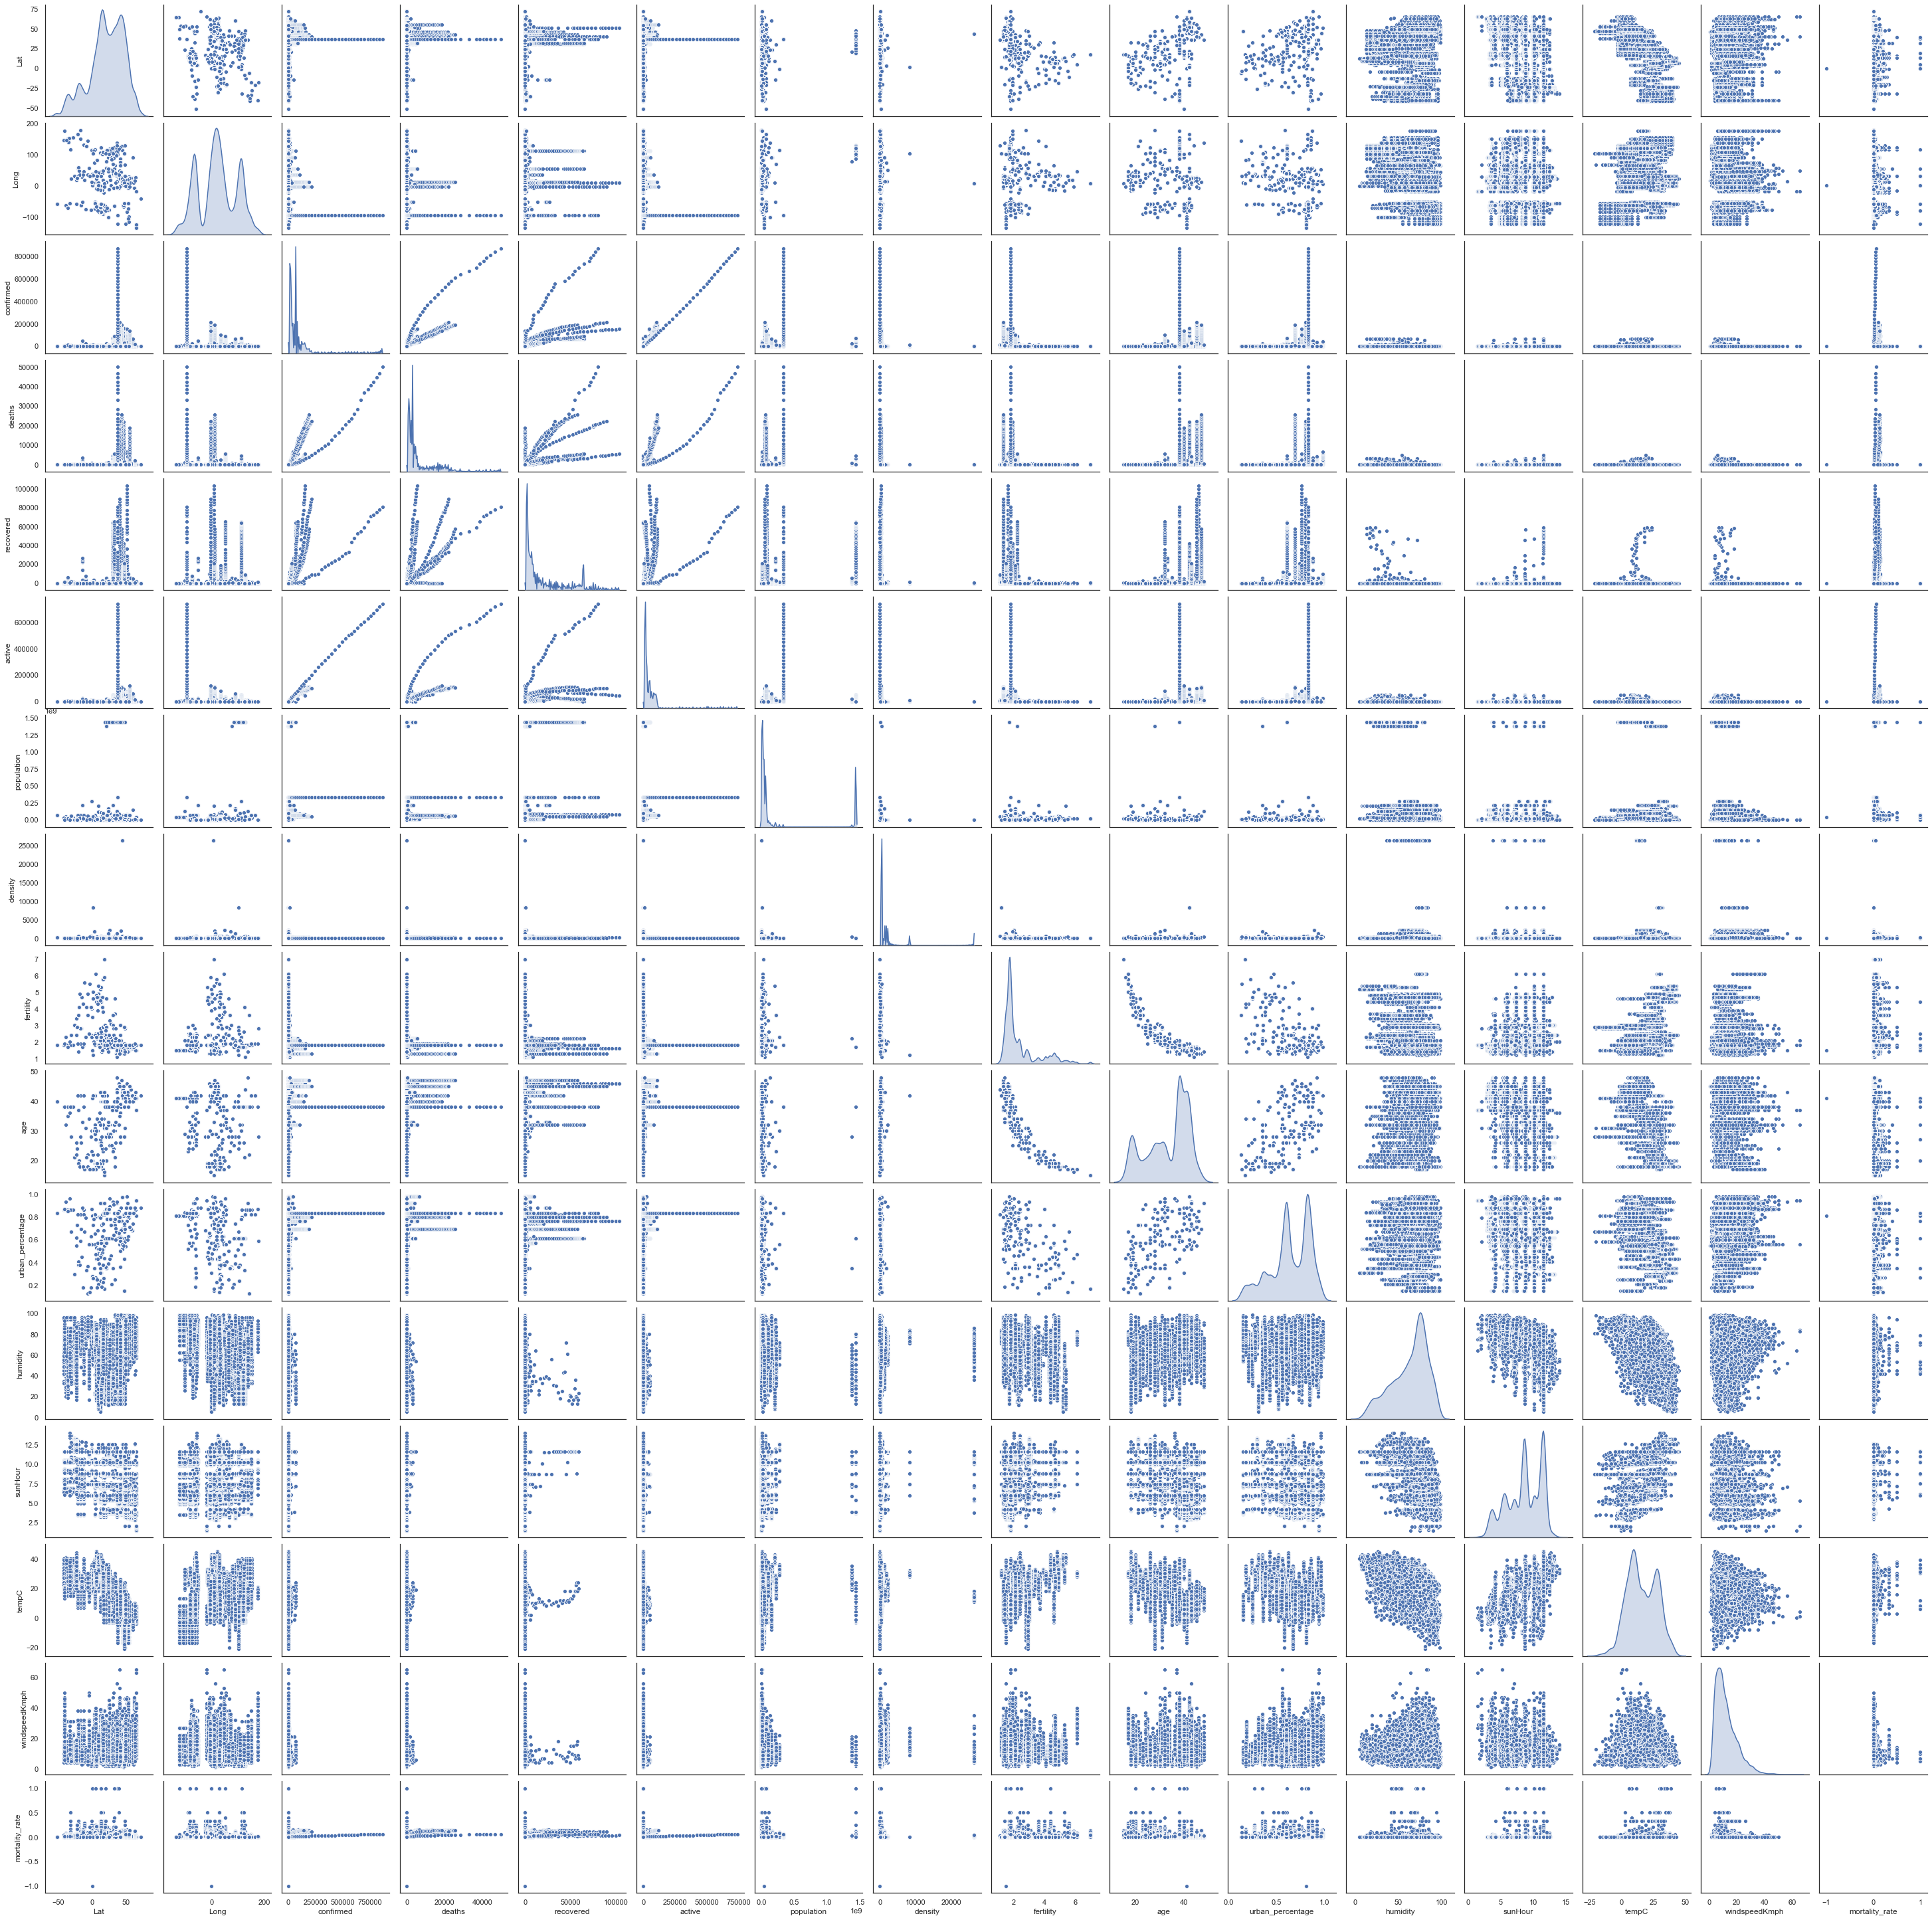

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [33]:
density_data = data.groupby(['tempC', 'country'])['confirmed'].sum()
density_data = density_data.reset_index()
#density_data['tempC'] = pd.to_datetime(density_data['tempC'])

## Temperature vs No. of Cases

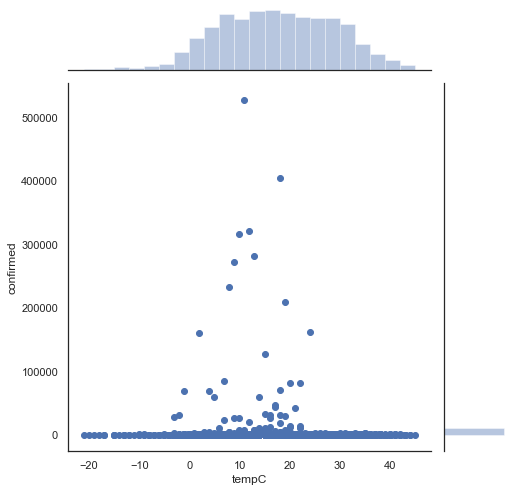

In [36]:
sns.jointplot(x="tempC", y="confirmed", data=density_data, size=7)

In [37]:
density_data = data.groupby(['windspeedKmph', 'country'])['confirmed'].sum()
density_data = density_data.reset_index()

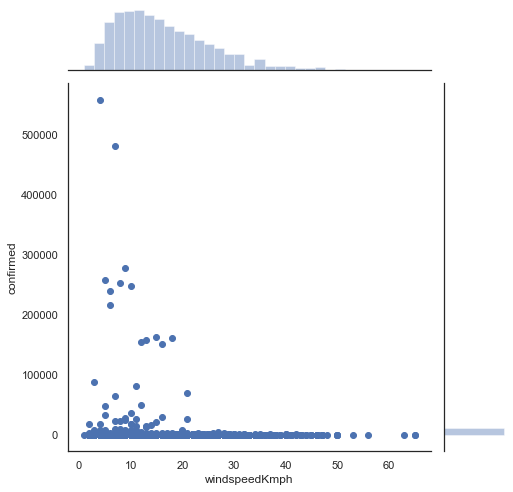

In [38]:
sns.jointplot(x="windspeedKmph", y="confirmed", data=density_data, size=7)